## Table of contents:  
[Business Understanding](#business-understanding)  
[Data Understanding](#aa)  
[Prepare Data](#prepare-data)  
[Data Visualization and Evaluate](#data-visualization-and-evaluate)  
* [**<u>Question 1<u>**: What is the busiest day of the week and month?](#question-1)
* [**<u>Question 2<u>**: The top 5 property types of AirBnB have the most in Seattle?](#question-2)
* [**<u>Question 3<u>**: What was the monthly revenue of Airbnb in Seattle in 2016?](#question-3)

## Business Understanding <a id="business-understanding"> </a>

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. It is even more advanced now.
The goal of this project is to identify the features of AirBnB that will draw in more guests.

This project will find the answers to the following three questions:

* **<u>Question 1<u>**: What is the busiest day of the week and month?

* **<u>Question 2<u>**: The top 5 property types of AirBnB have the most in Seattle?

* **<u>Question 3<u>**: How much cash should you have ready to rent an AirBnB in Seattle?

## Data Understanding <a id="data-understanding"></a>

In [1]:
# import library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 999

In [2]:
# read data calendar
df_calen = pd.read_csv('./calendar.csv', parse_dates=['date'])
df_calen.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
df_calen.shape

(1393570, 4)

In [4]:
df_calen.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [5]:
# check null value
df_calen.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [6]:
# check number of unique values of listing_id
a = df_calen['listing_id'].unique()
len(a)

3818

In [7]:
# read data listings
df_listings = pd.read_csv('./listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
df_listings.shape

(3818, 92)

dataset listings have too much columns, need to eliminate 

In [9]:
df_listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [10]:
df_listings.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [11]:
df_listings.columns[df_listings.isna().any()]

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'zipcode', 'property_type', 'bathrooms', 'bedrooms',
       'beds', 'square_feet', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'reviews_per_month'],
      dtype='object')

## Prepare Data <a id="prepare-data"></a>

### Some definition help to process data in this project

Data have some symbol like $ in Price column, so we need to remove that symbol, make it easy to answer question 3.

In [12]:
# def get price because price have symbol $
def get_price(df, columns):
    # Remove the dollar sign and any other non-digit characters
    for column in columns:
         df[column] = df[column].str.replace(r'[^0-9.]', '', regex=True)
         df[column] = df[column].astype('float')
    return df

In listings and calendar dataset, we have too many columns, but we don't use all, so we just collect some columns.

In [13]:
df_listings = df_listings[['id', 'property_type', 'name', 'price']]
df_calen = df_calen[['listing_id', 'date', 'available']]

In [14]:
# Create new df by combine calendar and lítings
df_new = df_calen.merge(df_listings, left_on = ['listing_id'] , right_on = ['id'], how='left' )
df_new

,listing_id,date,available,id,property_type,name,price
0,241032,2016-01-04,t,241032,Apartment,Stylish Queen Anne Apartment,$85.00
1,241032,2016-01-05,t,241032,Apartment,Stylish Queen Anne Apartment,$85.00
2,241032,2016-01-06,f,241032,Apartment,Stylish Queen Anne Apartment,$85.00
3,241032,2016-01-07,f,241032,Apartment,Stylish Queen Anne Apartment,$85.00
4,241032,2016-01-08,f,241032,Apartment,Stylish Queen Anne Apartment,$85.00
...,...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,10208623,Apartment,Large Lakefront Apartment,$87.00
1393566,10208623,2016-12-30,f,10208623,Apartment,Large Lakefront Apartment,$87.00
1393567,10208623,2016-12-31,f,10208623,Apartment,Large Lakefront Apartment,$87.00
1393568,10208623,2017-01-01,f,10208623,Apartment,Large Lakefront Apartment,$87.00


In [15]:
# check number of values
df_new.shape

(1393570, 7)

In [16]:
# create column year
df_new['year'] = df_new['date'].dt.year

In [17]:
# create column month
df_new['month'] = df_new['date'].dt.month

In [18]:
# create column day of week
df_new['day_of_week'] = df_new['date'].dt.day_name()

In [19]:
# check number of data base on year
year_check = df_new['year'].value_counts()/df_new.shape[0] * 100
year_check

year
2016    99.452055
2017     0.547945
Name: count, dtype: float64

We can see that, the number of data in 2017 is small, so we eliminate them and just get data from 2016 to make sense when answer questions above.

In [20]:
# Create df for data just for booked and them in 2016
df_new_2016 = df_new.loc[(df_new['year'] == 2016) & (df_new['available'] == 'f')]

In [21]:
df_new_2016['day_of_week']

2          Wednesday
3           Thursday
4             Friday
5           Saturday
6             Sunday
             ...    
1393563      Tuesday
1393564    Wednesday
1393565     Thursday
1393566       Friday
1393567     Saturday
Name: day_of_week, Length: 457090, dtype: object

## Data Visualization and Evaluate <a class="anchor" id="data-visualization-and-evaluate"></a>

### Question 1: What is the busiest day of the week and month? <a id="question-1"></a>

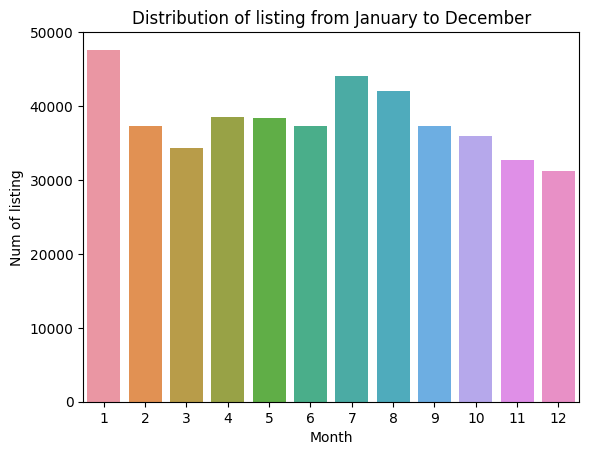

In [22]:
# create new dataframe to store
df_grp_by_mon = df_new_2016.groupby('month').count()
ax = sns.barplot( x = df_grp_by_mon.index.values, y = df_grp_by_mon['listing_id'].values)
ax.set_ylabel("Num of listing")
ax.set_xlabel("Month")
ax.set_title("Distribution of listing from January to December")
plt.savefig('./graph/Distribution of listing from January to December.png')

In [23]:
min(df_grp_by_mon['id'])

31297

In [24]:
df_grp_by_mon

,listing_id,date,available,id,property_type,name,price,year,day_of_week
month,,,,,,,,,
1,47665,47665,47665,47665,47637,47665,47665,47665,47665
2,37401,37401,37401,37401,37373,37401,37401,37401,37401
3,34420,34420,34420,34420,34420,34420,34420,34420,34420
4,38503,38503,38503,38503,38503,38503,38503,38503,38503
5,38387,38387,38387,38387,38387,38387,38387,38387,38387
6,37296,37296,37296,37296,37296,37296,37296,37296,37296
7,44136,44136,44136,44136,44136,44136,44136,44136,44136
8,42011,42011,42011,42011,42011,42011,42011,42011,42011
9,37294,37294,37294,37294,37294,37294,37294,37294,37294


As result we can see that January, July and August are months that busiest of 2016.

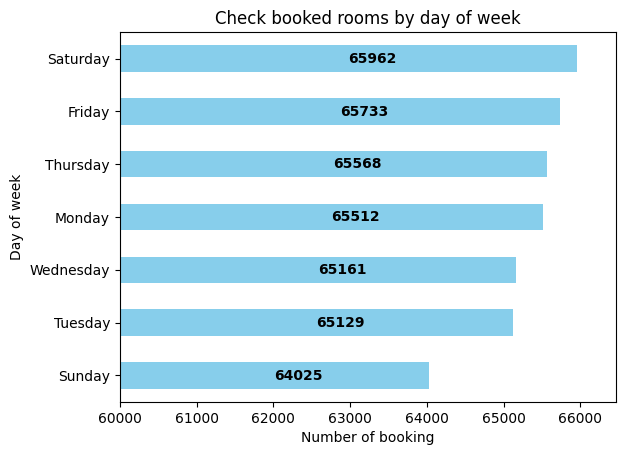

In [25]:
dow = df_new_2016['day_of_week'].value_counts().sort_values()
ax = dow.plot(kind='barh',  color='skyblue')
plt.xlim([60000, max(dow) + 500])
# Add value labels to each bar
for i, v in enumerate(dow):
    ax.text(60000 + (v-60000)/2, i , str(v), color='black', fontweight='bold', va = 'center')
plt.title('Check booked rooms by day of week')
plt.ylabel('Day of week')
plt.xlabel('Number of booking')
# save chart
plt.savefig('./graph/Check booked rooms by day of week.png');
# show chart
plt.show();



People often choose Friday and Saturday to book AirBnB

### Question 2: The top 5 property types of AirBnB have the most in Seattle? <a id="question-2"></a>

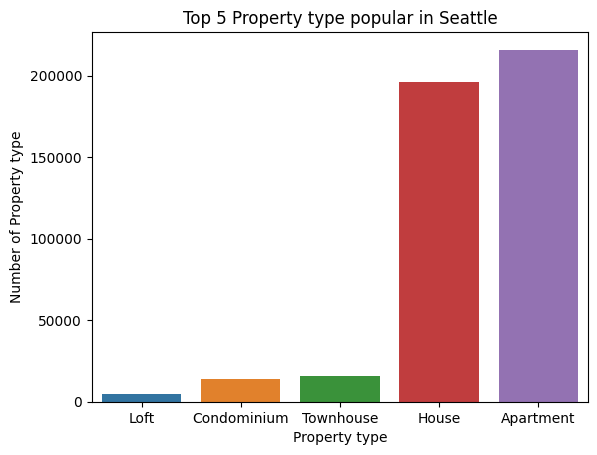

In [26]:
# Assuming 'name' is a Series with index as the Airbnb names and values as counts
property_type = df_new[df_new['available'] == 'f']['property_type'].value_counts()[0:5].sort_values(ascending = True)

ax = sns.barplot( x = property_type.index.values, y = property_type.values)
# ax.set_ylim(0, max(df_grp_by_mon['listing_id'].values) + 1000)
ax.set_ylabel("Number of Property type")
ax.set_xlabel("Property type")
ax.set_title("Top 5 Property type popular in Seattle")

plt.savefig('./graph/Top 5 Property type popular in Seattle.png')


### Question 3: What was the monthly revenue of Airbnb in Seattle in 2016?
 <a id="question-3"></a>

In [27]:
# Using define function to convert price
get_price(df_new_2016, ['price'])

,listing_id,date,available,id,property_type,name,price,year,month,day_of_week
2,241032,2016-01-06,f,241032,Apartment,Stylish Queen Anne Apartment,85.0,2016,1,Wednesday
3,241032,2016-01-07,f,241032,Apartment,Stylish Queen Anne Apartment,85.0,2016,1,Thursday
4,241032,2016-01-08,f,241032,Apartment,Stylish Queen Anne Apartment,85.0,2016,1,Friday
5,241032,2016-01-09,f,241032,Apartment,Stylish Queen Anne Apartment,85.0,2016,1,Saturday
6,241032,2016-01-10,f,241032,Apartment,Stylish Queen Anne Apartment,85.0,2016,1,Sunday
...,...,...,...,...,...,...,...,...,...,...
1393563,10208623,2016-12-27,f,10208623,Apartment,Large Lakefront Apartment,87.0,2016,12,Tuesday
1393564,10208623,2016-12-28,f,10208623,Apartment,Large Lakefront Apartment,87.0,2016,12,Wednesday
1393565,10208623,2016-12-29,f,10208623,Apartment,Large Lakefront Apartment,87.0,2016,12,Thursday
1393566,10208623,2016-12-30,f,10208623,Apartment,Large Lakefront Apartment,87.0,2016,12,Friday


In [28]:
df_income = df_new_2016.groupby('month').sum('price')['price']
df_income

month
1     6237723.0
2     5013744.0
3     4718709.0
4     5021914.0
5     5011381.0
6     4893535.0
7     5616174.0
8     5342659.0
9     4714950.0
10    4534792.0
11    4141330.0
12    3937010.0
Name: price, dtype: float64

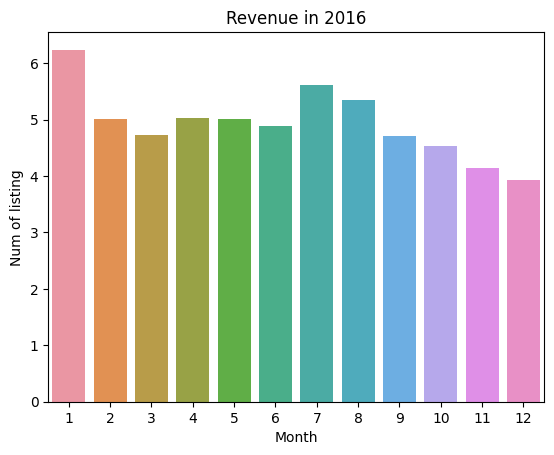

In [29]:
ax = sns.barplot( x = df_income.index.values, y = df_income.values/1000000)
ax.set_ylabel("Num of listing")
ax.set_xlabel("Month")
ax.set_title("Revenue in 2016");
plt.savefig('./graph/Revenue in 2016.png')


Based on the chart, we observe the following Revenue for Airbnb listings in Seattle during 2016: **January** is the month have highest revenue with over **6 milion dollar**. **July** and **August** get over **5 milion dollar**, and **December** is the month is lowest revenue about **4 milion dollar**.  
These insights highlight the seasonal variations in Airbnb revenue, with winter months generally yielding lower earnings compared to summer months.